In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df = pd.read_csv('./MBTI 500.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
5,loose stop overthinking everything ruin friend...,INTJ
6,often men one put chance get burn otherwise no...,INTJ
7,early definitely relate quiet self destruction...,INTJ
8,one full list would impossibly long quotable f...,INTJ
9,technique information power share unless absol...,INTJ


In [3]:
df['encoded_type'] = df['type'].astype('category').cat.codes
d_label = dict(enumerate(df['type'].astype('category').cat.categories))
print(d_label)
df.head(10)

{0: 'ENFJ', 1: 'ENFP', 2: 'ENTJ', 3: 'ENTP', 4: 'ESFJ', 5: 'ESFP', 6: 'ESTJ', 7: 'ESTP', 8: 'INFJ', 9: 'INFP', 10: 'INTJ', 11: 'INTP', 12: 'ISFJ', 13: 'ISFP', 14: 'ISTJ', 15: 'ISTP'}


,posts,type,encoded_type
0,know intj tool use interaction people excuse a...,INTJ,10
1,rap music ehh opp yeah know valid well know fa...,INTJ,10
2,preferably p hd low except wew lad video p min...,INTJ,10
3,drink like wish could drink red wine give head...,INTJ,10
4,space program ah bad deal meing freelance max ...,INTJ,10
5,loose stop overthinking everything ruin friend...,INTJ,10
6,often men one put chance get burn otherwise no...,INTJ,10
7,early definitely relate quiet self destruction...,INTJ,10
8,one full list would impossibly long quotable f...,INTJ,10
9,technique information power share unless absol...,INTJ,10


In [4]:
print(df.loc[0]["posts"])

know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low swe

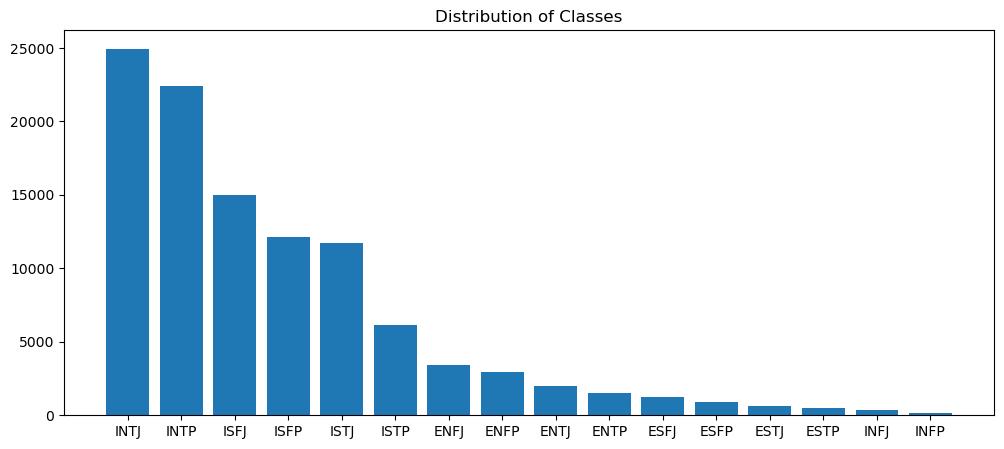

In [5]:
plt.figure(figsize=(12,5))
plt.bar(df['type'].unique(),df['type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [6]:
# Split Train and Validation data
train_texts, val_texts, train_labels, val_labels = train_test_split(df['posts'].to_list(), df['encoded_type'].to_list(), test_size=0.2, random_state=42, shuffle=True)
 
# Keep some data for inference (testing)
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42, shuffle=True)

print(f"Length of training set: {len(train_texts)}\nLength of validation set: {len(val_texts)}\nLength of test set: {len(test_texts)}")

Length of training set: 76367
Length of validation set: 21214
Length of test set: 8486


In [7]:
# #Preprocess data (not needed for this dataset)
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import string

# stop_words = set(stopwords.words('english'))
# def preprocess(text):
#     text = text.lower()
#     text = ''.join([word for word in text if word not in string.punctuation])
#     tokens = word_tokenize(text)
#     tokens = [word for word in tokens if word not in stop_words]
#     return ' '.join(tokens)

# X_train = train_texts, val_texts, train_labels, val_labels = train_test_split(df['posts'].to_list(), df['encoded_type'].to_list(), test_size=0.2, random_state=0, shuffle=True).apply(preprocess)
# X_test = test_texts.apply(preprocess)

# CNN

In [8]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Activation, Embedding, Flatten
from tensorflow.keras.models import Sequential

In [9]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

train_texts_seq = tokenizer.texts_to_sequences(train_texts)
val_texts_seq = tokenizer.texts_to_sequences(val_texts)
test_texts_seq = tokenizer.texts_to_sequences(test_texts)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

213345


In [10]:
# Pad the sequences to a fixed length
max_length = 500
train_texts_seq = pad_sequences(train_texts_seq, maxlen=max_length, padding='post')
val_texts_seq = pad_sequences(val_texts_seq, maxlen=max_length, padding='post')
test_texts_seq = pad_sequences(test_texts_seq, maxlen=max_length, padding='post')

In [11]:
# print(x_train_seq[0], len(x_train_seq[0]))
print(len(train_texts_seq), len(train_texts_seq[0]))
print(train_texts[0])
print(train_texts_seq[0])

76367 500
boba well ah look like edit post read originally know look entjs thus response helpful mean imply entjs date may difficu find sure would target entj gym however entjs career group easy spot toastmaster similar professional development organization might good place look hopefully single entjs give good advice age sex sexual orientation location stand see people fuck thing could good tinder bio ever saw one hah haha feel like could write part kind post seem pop often wolf solitary creature powerful fast smart however know need others hunt live woman general may tend empathetic side personally fit mold know mbti take test employment remember exactly score letter value pretty extreme nowhere close middle grind solid entj good bad empathy definitely something struggle come woman perspective come perspective entj work really hard address challenge come one view pride one difficuy empathize people detriment personal professional relational growth easy confidence mistake narcissism i

In [12]:
vs = 200
sentences = [sentence.split() for sentence in train_texts]
w2v_model = Word2Vec(sentences, vector_size=vs, window=5, min_count=5, workers=4)
print(w2v_model)

# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, vs))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

Word2Vec(vocab=50992, vector_size=200, alpha=0.025)


In [13]:
 # Define the CNN model
model = Sequential()
model.add(Embedding(vocab_size, vs, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
result = model.fit(np.array(train_texts_seq), np.array(train_labels), validation_data=(np.array(val_texts_seq), np.array(val_labels)), epochs=20, batch_size=32, verbose=2)
model_name = './saved_model/cnn_w2v_' + str(vs) + '.keras'
model.save(model_name)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          42669000  
                                                                 
 dropout (Dropout)           (None, 500, 200)          0         
                                                                 
 conv1d (Conv1D)             (None, 496, 128)          128128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 248, 128)         0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 248, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 244, 128)          82048     
                                                        

In [18]:
new_model = tf.keras.models.load_model('./saved_model/cnn_w2v_200.keras')

In [15]:
test_texts

['point cannot really define anymore drive legitimacy crazy sorry father maybe one day figure relax tautology yes know much personality mbti rather introvert isfj process use function mostly unconscious young till unwillingness thread suppose harmony one one group setting still remain inner long open transparent age also acknowledge develop enough mode communication evolve conscious choice ti rationalisation play may like acknowledge current limitation practical need tap conscious practice read relate book manage camouflage somewhat extroverted person may visualise muiple self apparent exhaust allow another side apparent include family though typically little energy leave home alone others need outside time much like day also acknowledge rationalise fe necessity continue function interpersonally thus catch continue isfj pls sand halp mostly acceptance fe think sorry coherent good self analysis example thing remember gradually lose touch friend highschool graduate drift apart make new f

266/266 - 2s - loss: 0.9978 - accuracy: 0.7766 - 2s/epoch - 6ms/step
Test Loss: 0.997797966003418
Test Accuracy: 0.7765731811523438
266/266 [==============================] - 1s 3ms/step
Confusion Matrix:


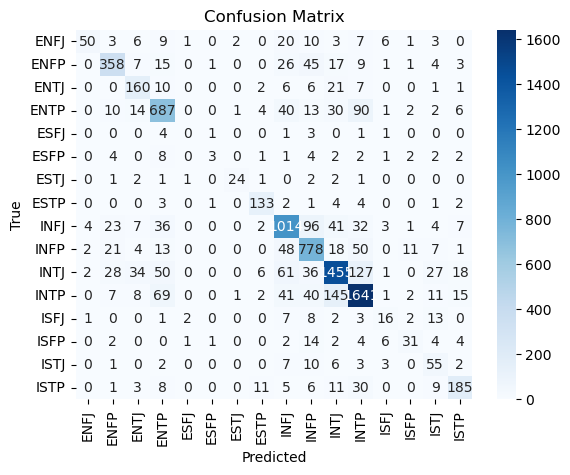

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.85      0.41      0.56       121
        ENFP       0.78      0.74      0.76       487
        ENTJ       0.65      0.75      0.70       214
        ENTP       0.75      0.76      0.76       900
        ESFJ       0.00      0.00      0.00        11
        ESFP       0.43      0.09      0.15        32
        ESTJ       0.86      0.69      0.76        35
        ESTP       0.82      0.88      0.85       151
        INFJ       0.79      0.80      0.79      1270
        INFP       0.73      0.82      0.77       953
        INTJ       0.83      0.79      0.81      1845
        INTP       0.82      0.83      0.82      1983
        ISFJ       0.40      0.29      0.34        55
        ISFP       0.58      0.44      0.50        71
        ISTJ       0.38      0.62      0.47        89
        ISTP       0.75      0.69      0.72       269

    accuracy                           0.78      8486
   

: 

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

x_test = np.array(test_texts_seq)
y_test = np.array(test_labels)
loss, accuracy = new_model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Generate predictions
y_pred = new_model.predict(x_test)

# For multi-class classification
y_pred_classes = y_pred.argmax(axis=-1)

# Convert y_test to class labels if needed
y_test_classes = y_test.argmax(axis=-1) if len(y_test.shape) > 1 else y_test

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=d_label.values(), yticklabels=d_label.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_test_classes, y_pred_classes, target_names=d_label.values())
print("Classification Report:")
print(class_report)


# DistilBert

In [17]:
#Distilbert 
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(train_texts, truncation = True, padding = True )
val_encodings = tokenizer(val_texts, truncation = True, padding = True )



KeyboardInterrupt: 

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
dict(train_encodings),
train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
dict(val_encodings),
val_labels
))

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=16)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

In [ ]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
 
model.fit(train_dataset.shuffle(1000).batch(4),
epochs=2,
batch_size=4,
validation_data=val_dataset.shuffle(1000).batch(4),
callbacks=[early_stopping])
model.summary()

In [ ]:
from tf.keras.models import load_model
save_directory = "Multitext_Classification_colab" # Change this to your preferred location
 
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

In [ ]:
save_directory = "Multitext_Classification_2"
loaded_tokenizer = DistilBertTokenizer.from_pretrained(save_directory)
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

In [ ]:
from transformers import TFDistilBertForSequenceClassification, Trainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          
    num_train_epochs=7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=64,   
    warmup_steps=500,                
    weight_decay=1e-5,               
    logging_dir='./logs',            
    eval_steps=100                   
)

with training_args.strategy.scope():
    trainer_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 5 )


trainer = Trainer(
    model=trainer_model,                 
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=val_dataset,            
)

In [ ]:
predict_input = tokenizer_fine_tuned.encode(
    test_text,
    truncation = True,
    padding = True,
    return_tensors = 'tf'    
)

output = model_fine_tuned(predict_input)[0]

prediction_value = tf.argmax(output, axis = 1).numpy()[0]
prediction_value